# **Darcys Experiment**

**Sebastian Gnann**


Bei Fragen und Feedback wenden Sie sich bitte an: sebastian.gnann@hydrologie.uni-freiburg.de

---

## Henry Darcy

Henry Darcy war ein französischer Ingenieur, der heutzutage vor allem für sein für die Hydrogeologie grundlegendes Gesetz bekannt ist.

<img src="figures/Henry_Darcy.png" alt="drawing" width=200/>

**Abb.1**: Porträt von Henry Darcy von F. Perrodin, aus der Sammlung der Bibliothéque Municipale von Dijon. Aus Brown (2002).


## Wasser für Dijon

Henry Darcy wurde 1832 beauftragt die Wasserversorgung der Stadt Dijon zu planen.
Um eine ausreichende Wasserqualität sicherzustellen, sollten Sandfilter verwendet werden. 
Es war jedoch unklar, wie schnell die Sandfilter das Wasser reinigen können und damit wie viele Filter benötigt wurden.
Darcy führte daher Fließversuche mit sandgefüllten Säulen durch.

<img src="figures/Darcys_Apparatus.png" alt="drawing" width=300/>

**Abb.2**: Säulenapparat (Darcy, 1856; Abbildung 3, Tafel 24). Aus Brown (2002).

## Quellen

Darcy, H. (1856). Les fontaines publiques de la ville de Dijon: exposition et application des principes à suivre et des formules à employer dans les questions de distribution d'eau (Vol. 1). Victor dalmont.
https://books.google.de/books?hl=en&lr=&id=yXKx1zPVQMUC&oi=fnd&pg=PA1&ots=UdPk-oEje5&sig=ksXQ76YnQa8TMkioUfaoD7dF89s&redir_esc=y#v=onepage&q&f=false

Freeze, R. A. (1994). Henry Darcy and the fountains of Dijon. Groundwater, 32(1), 23-30.
https://ngwa.onlinelibrary.wiley.com/doi/epdf/10.1111/j.1745-6584.1994.tb00606.x

Brown, G. O. (2002). Henry Darcy and the making of a law. Water Resources Research, 38(7), 11-1.
https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2001WR000727



In [1]:
# import all necessary Python packages
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import ipywidgets as widgets

## Darcys Bericht

Die Ergebnisse aus Darcys Versuchen sind in seinem Bericht (1856) festgehalten. 
Diese können nun genutzt werden um Darcys ursprüngliche Analyse erneut durchzuführen und dadurch selbst das Darcy Gesetz empirisch herzuleiten.

In [2]:
# load data into workspace
df = pd.read_csv("results/Darcys_Experiment_1.csv", sep=',')
df["Flow"] = df["Flow"]/(np.pi*(.35/2)**2*60*1000) # convert to m/s
df2 = pd.read_csv("results/Darcys_Experiment_2.csv", sep=',')
df2["Flow"] = df2["Flow"]/(np.pi*(.35/2)**2*60*1000) # convert to m/s
df.head()
#df2.head()

,Set,Number,Duration,Flow,Pressure,Ratio of flow to pressure
0,1.0,1.0,25.0,0.000624,1.11,3.25
1,1.0,2.0,20.0,0.001325,2.36,3.24
2,1.0,3.0,15.0,0.002079,4.00,3.00
3,1.0,4.0,18.0,0.002474,4.90,2.91
4,1.0,5.0,17.0,0.002633,5.02,3.03


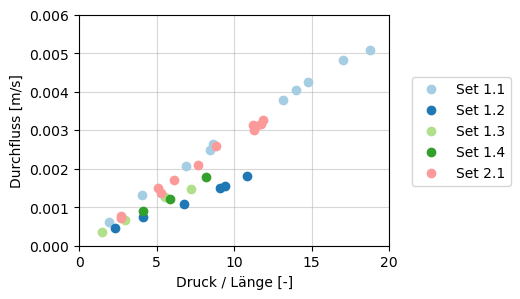

In [3]:
# plot data
fig, ax = plt.subplots(figsize=(4, 3))
ax.plot(df.loc[df["Set"]==1,"Pressure"]/0.58, df.loc[df["Set"]==1,"Flow"], 'o', c='#a6cee3', label='Set 1.1')
ax.plot(df.loc[df["Set"]==2,"Pressure"]/1.14, df.loc[df["Set"]==2,"Flow"], 'o', c='#1f78b4', label='Set 1.2')
ax.plot(df.loc[df["Set"]==3,"Pressure"]/1.71, df.loc[df["Set"]==3,"Flow"], 'o', c='#b2df8a', label='Set 1.3')
ax.plot(df.loc[df["Set"]==4,"Pressure"]/1.70, df.loc[df["Set"]==4,"Flow"], 'o', c='#33a02c', label='Set 1.4') 
ax.plot(df2.loc[df2["Set"]==1,"Pressure difference"]/1.1, df2.loc[df2["Set"]==1,"Flow"], 'o', c='#fb9a99', label='Set 2.1')
ax.set_xlim([0, 20])
ax.set_ylim([0, 0.006])
plt.xlabel('Druck / Länge [-]')
plt.ylabel('Durchfluss [m/s]')
plt.legend(bbox_to_anchor=(1.05, 0.76))
plt.grid(alpha=0.5)
%matplotlib inline

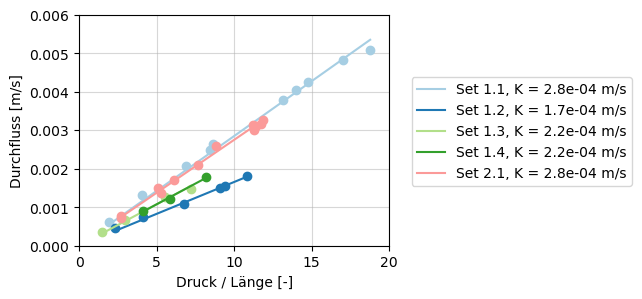

In [4]:
# fit data
def plot_linear_regression(X,Y,color,text):
    model = LinearRegression(fit_intercept=False)
    model.fit(X, Y)
    predictions = model.predict(X)
    slope = model.coef_[0]
    ax.plot(X, Y, 'o', c=color)
    ax.plot(X, predictions, '-', c=color, label=text+f', K = {slope:.1e} m/s') #.2f

# plot data
fig, ax = plt.subplots(figsize=(4, 3))
plot_linear_regression(df.loc[df["Set"]==1,"Pressure"].values.reshape(-1, 1)/0.58, df.loc[df["Set"]==1,"Flow"],'#a6cee3','Set 1.1')
plot_linear_regression(df.loc[df["Set"]==2,"Pressure"].values.reshape(-1, 1)/1.14, df.loc[df["Set"]==2,"Flow"],'#1f78b4','Set 1.2')
plot_linear_regression(df.loc[df["Set"]==3,"Pressure"].values.reshape(-1, 1)/1.71, df.loc[df["Set"]==3,"Flow"],'#b2df8a','Set 1.3')
plot_linear_regression(df.loc[df["Set"]==4,"Pressure"].values.reshape(-1, 1)/1.70, df.loc[df["Set"]==4,"Flow"],'#33a02c','Set 1.4')
plot_linear_regression(df2.loc[df2["Set"]==1,"Pressure difference"].values.reshape(-1, 1)/1.1, df2.loc[df2["Set"]==1,"Flow"],'#fb9a99','Set 2.1')
ax.set_xlim([0, 20])
ax.set_ylim([0, 0.006])
plt.xlabel('Druck / Länge [-]')
plt.ylabel('Durchfluss [m/s]')
#plt.grid(alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 0.76))
%matplotlib inline

## Ergebnisse aus Darcys Bericht

Darcy (1856), übersetzt aus dem Französischen: "Die Unterschiede zwischen den Koeffizientenwerten rühren daher, dass der verwendete Sand nicht durchgehend homogen war. Bei der zweiten Serie war er nicht gewaschen, bei der dritten Serie war er gewaschen und bei der vierten Serie war er sehr gut gewaschen und etwas stärker gekörnt."

Die folgenden Leitfähigkeiten wurden von Darcy berechnet. Der letzte Wert ist, wie von Freeze (1994) und Brown (2002) bemerkt, entweder falsch berechnet oder die angegebene Säulenlänge stimmt nicht.

| Set | Gleichung | $K$ [m/s] |
| -------- | -------- | ------- |
| 1.1 | $Q$ = 0.286 $I$ | 2.9e-4 |
| 1.2 | $Q$ = 0.165 $I$ | 1.7e-4 |
| 1.3 | $Q$ = 0.216 $I$ | 2.2e-4 |
| 1.4 | $Q$ = 0.332 $I$ | 3.3e-4 |

Es gibt einige unklare Stellen in Darcys Bericht, beispielsweise ist die Bennenung der Variablen nicht immer konsistent. Insgesamt beschreibt er aber eindrucksvoll die Entdeckung eines Zusammenhangs, der später vielfach experimentell bestätigt und theoretisch hergeleitet wurde. Darcys Gesetz gehört heutzutage zu den Grundlagen der Hydrogeologie sowie anderer Wissenschaften, die sich mit dem Fließen von Fluiden durch poröse Medien beschäftigen.

In [5]:
def f(K):
    
    K_default = 1e-4
    X = df.loc[df["Set"]==1,"Pressure"].values.reshape(-1, 1)/0.58
    Y_default = K_default*X
    Y = K*X
    fig, ax = plt.subplots(figsize=(4, 3))
    ax.plot(X, Y_default, 'o', c='grey', label='K = 1e-4 m/s')
    ax.plot(X, Y, 'o', c='#a6cee3', label=f'K = {K:.1e} m/s')
    ax.set_xlim([0, 20])
    ax.set_ylim([0, 0.01])
    plt.xlabel('Druck / Länge [-]')
    plt.ylabel('Durchfluss [m/s]')
    plt.grid(alpha=0.5)
    plt.legend(bbox_to_anchor=(1.05, 0.76))

widgets.interact(f, K=np.logspace(-6,-3, 4))

%matplotlib inline

interactive(children=(Dropdown(description='K', options=(1e-06, 1e-05, 0.0001, 0.001), value=1e-06), Output())…